In [21]:
import numpy
import pandas
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import csv
import shapely
from shapely.geometry import Point, GeometryCollection
from libpysal.weights import Queen, Rook, KNN
from pysal.lib import weights
import libpysal

Making Grid Neighbourhoods

In [89]:



##schools = schools.sort_values('lat')
schools.head()

#ceara_schools = schools[schools["NM_UF"] == "Ceará"]

,Unnamed: 0,index,id,NUMPOINTS,ID,land,pop,built_s,built_v,smod,x,y
0,1,1,1568536.0,0,1.0,1000000.0,0.000000,0.0,0.0,11.0,-4.146928e+06,-415647.743962
1,2,2,1568537.0,0,2.0,1000000.0,0.000000,0.0,0.0,11.0,-4.146995e+06,-416168.514849
2,3,3,1570658.0,0,3.0,1000000.0,89.137142,4644.0,11618.0,12.0,-4.145898e+06,-412699.018444
3,4,4,1570659.0,0,4.0,1000000.0,8.601842,359.0,898.0,11.0,-4.146006e+06,-413307.519153
4,5,5,1570660.0,0,5.0,1000000.0,2.825484,141.0,353.0,11.0,-4.146103e+06,-414290.948276


In [77]:
gdf = geopandas.GeoDataFrame(schools, 
            geometry=geopandas.points_from_xy(schools.x, schools.y),
            crs="+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs")
gdf.head()
gdf = gdf.drop(columns = ['x', 'y'])

xmin, ymin, xmax, ymax= gdf.total_bounds

print(xmin, ymin, xmax, ymax)

-4146994.8701617 -970037.041064933 -3725680.19180611 -344546.309299826


In [62]:
schools_shp = geopandas.read_file("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_brazil_density_1km.shp").set_index("id")

In [63]:
#rW = Rook.from_shapefile("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ne_brazil_school_density_1km.shp") #, to_file = "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ne_grid_weights.shp")

rW = Rook.from_shapefile("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_brazil_density_1km.shp")

#schools.hist(column = 'NUMPOINTS', bins = 10)

#ax = schools.plot(column='NUMPOINTS', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


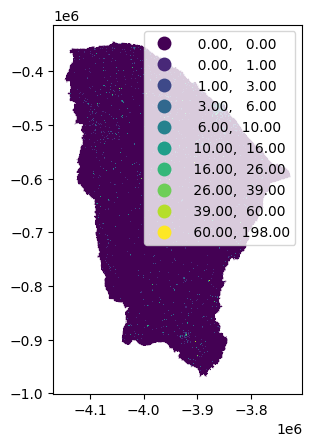

In [18]:
schools_shp.plot(column = "NUMPOINTS", 
                 legend = True,
                 scheme = "natural_breaks",
                 k = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f659ce51cd0>]],
      dtype=object)

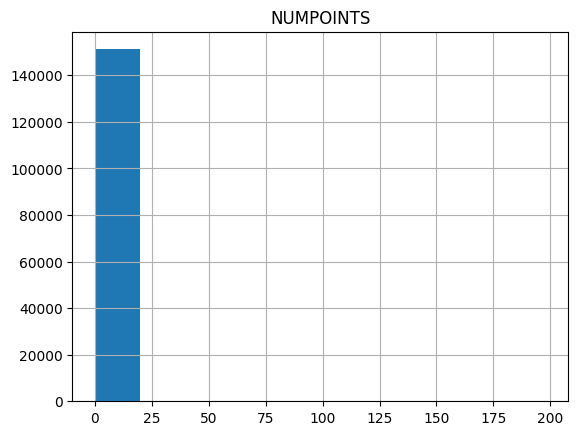

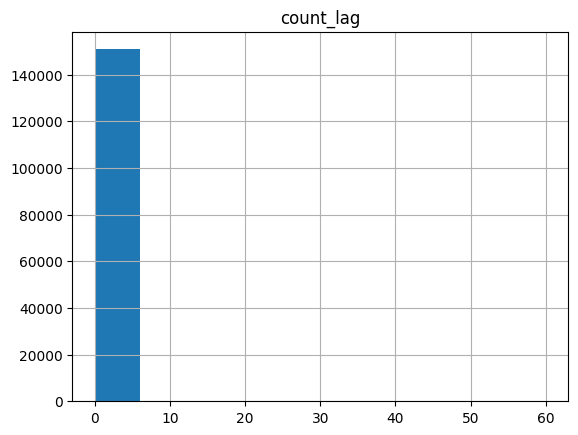

In [28]:
schools_shp

rW.transform = "R"
schools_shp["count_lag"] = weights.spatial_lag.lag_spatial(rW, schools_shp["NUMPOINTS"])

schools_shp.hist(column = "NUMPOINTS")
schools_shp.hist(column = "count_lag")

In [48]:
from sklearn.cluster import KMeans

schools_df = geopandas.read_file("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data2.gpkg",
                                 layer = 'NUMPOINTS')
schools_df = schools_df[~schools_df['NUMPOINTS'].isna()]
schools_df.head()


DriverError: '/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data2.gpkg' not recognized as a supported file format.

In [107]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/ceara_school_count_data.csv", header = 0)

schools = schools[~schools[['x','y','land','built_s', 'built_v', 'pop', 'smod']].isna()]

schools.head() 
#kmeans = KMeans(n_clusters = 5)
#k5cls = kmeans.fit(schools[['land','built_s', 'built_v', 'pop', 'smod']])

,Unnamed: 0,index,id,NUMPOINTS,ID,land,pop,built_s,built_v,smod,x,y
0,NaN,NaN,NaN,NaN,NaN,1000000.0,0.000000,0.0,0.0,11.0,-4.146928e+06,-415647.743962
1,NaN,NaN,NaN,NaN,NaN,1000000.0,0.000000,0.0,0.0,11.0,-4.146995e+06,-416168.514849
2,NaN,NaN,NaN,NaN,NaN,1000000.0,89.137142,4644.0,11618.0,12.0,-4.145898e+06,-412699.018444
3,NaN,NaN,NaN,NaN,NaN,1000000.0,8.601842,359.0,898.0,11.0,-4.146006e+06,-413307.519153
4,NaN,NaN,NaN,NaN,NaN,1000000.0,2.825484,141.0,353.0,11.0,-4.146103e+06,-414290.948276


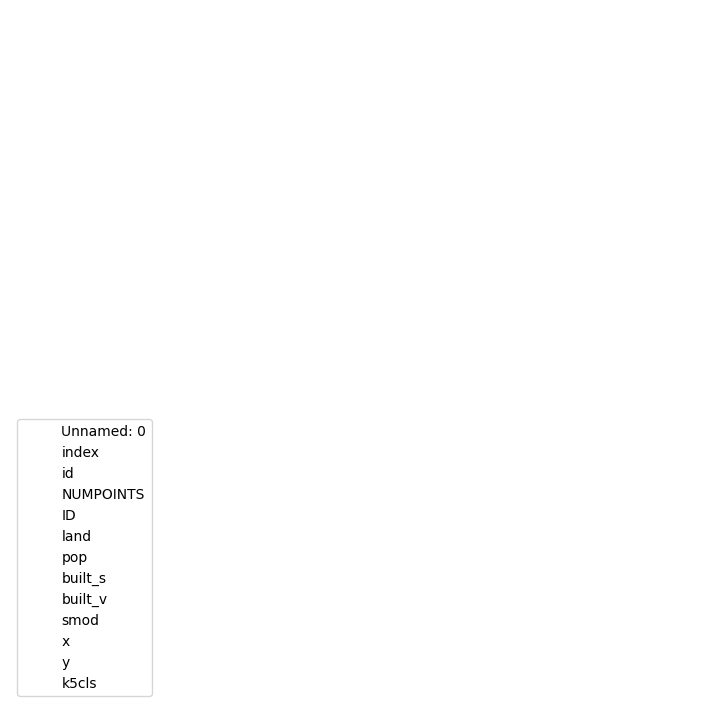

In [94]:
# Assign labels into a column
schools["k5cls"] = k5cls.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
schools.plot(
    column="k5cls", legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()